In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
def calcSim(target, predict):
    
    if len(target) != len(predict):
        return -1
    
    num_target = 0
    num_predict = 0
    num_union = 0    
    for i in range(len(target)):
        if (target[i] != 0):
            num_target = num_target + 1            
        if (predict[i] != 0):
            num_predict = num_predict + 1
        if (target[i] != 0) and (target[i] == predict[i]):
            num_union = num_union + 1
            
    sim = 2*(num_union/(num_target+num_predict))
    
    return sim

In [3]:
src = cv2.imread('./data/cardiac_cta.bmp', cv2.IMREAD_GRAYSCALE)
target = cv2.imread('./data/cardiac_label.bmp', cv2.IMREAD_GRAYSCALE)

In [4]:
## TODO : Segmentation
## 분할 결과를 predict라는 변수에 저장하면 됨
##
predict = cv2.imread('./data/cardiac_cta.bmp', cv2.IMREAD_GRAYSCALE)

ret2, predict = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize = (3, 3))
kernel2 = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize = (2, 2))

predict = cv2.morphologyEx(predict, cv2.MORPH_OPEN, kernel, iterations = 2)
predict = cv2.dilate(predict, kernel2, iterations = 1) #팽창


#우측 아래 제거
mask = np.zeros((predict.shape[0]+2, predict.shape[1]+2), np.uint8)
seed = (130, 193)
lodiff, updiff = (5, 5, 5), (5, 5, 5)
cv2.floodFill(predict, mask, seedPoint = seed, newVal = (0,0,0), 
              loDiff = lodiff, upDiff = updiff)

#하단 잡음 제거
seed = (177, 198)
cv2.floodFill(predict, mask, seedPoint = seed, newVal = (0,0,0), 
              loDiff = lodiff, upDiff = updiff)

seed = (77, 248)
cv2.floodFill(predict, mask, seedPoint = seed, newVal = (0,0,0), 
              loDiff = lodiff, upDiff = updiff)

(69,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 (71, 243, 8, 9))

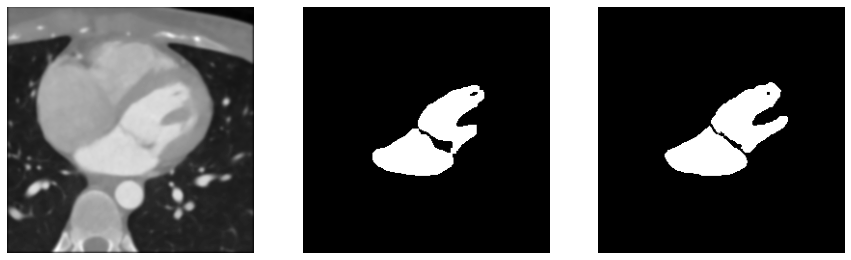

In [5]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(predict, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(target, cmap='gray')

In [6]:
target = target.flatten()
predict = predict.flatten()
print(target.shape)
print(predict.shape)

target[target[:] == 255] = 1
predict[predict[:] == 255] = 1

sim = calcSim(target, predict)
print("similarity: ", sim)

(65536,)
(65536,)
similarity:  0.9296390812978491
